In [1]:
# 1. Importar todas las librerias necesarias
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from textwrap import wrap

In [2]:
# 2. Inicializar variables
dataset = []
# 3. Crear funcion hostnames
def set_hostnames(host_number:int): 
    # Hostname 8 letters
    proporciones_1 = {"Linux":40, "Solaris":30, "AIX":20, "HP-UX":10}
    proporciones_2 = {"Development":10, "Integration":10, "Testing":25, "Staging":25,
                      "Production":30}
    proporciones_3 = {"NORWAY":6, "FRANCE":9, "ITALY":16, "SPAIN":16, "GERMANY":23, "IRELAND":30}
    
    
    # Omitir código repetitivo
    def obtain_proportion(dictionary:dict, letter_number:int, host_number, second_letter_number:int = None):
        # En caso de que sea una cadena de textos
        if second_letter_number is not None:
            all_text = []
            # Localizador de letras
            n_letter_range = [x[letter_number:second_letter_number] for x in dictionary.keys()]
            # Proporcion de frequencias
            primer_diccionario = dict(zip(n_letter_range, dictionary.values()))
            # Division para escalar frequencias segun numero de servidores
            host_division = sum(np.array([x for x in dictionary.values()])) / host_number
            # Modificar proporcion original por proporcion escalada, redondead hacia arriba para garantizar presencia
            proporcion_escalada = np.ceil(np.array(list(primer_diccionario.values())) / host_division)
            # Crear diccionario con frequencias escaladas
            nuevo_diccionario = dict(zip(primer_diccionario.keys(), proporcion_escalada))
            # Crear lista para elegir rango de caracteres de forma aleatoria
            n_letters_raw = [letra for letra, valor in nuevo_diccionario.items()]
            # Multiplicacion de sequencias de letras por frequencias normalizadas, separacion basado en longitud del rango y extraccion del valor
            for i in n_letters_raw:
                frequencia = nuevo_diccionario[str(i)]
                non_split_text = i * int(frequencia)
                longitud = letter_number + second_letter_number
                split_text = wrap(non_split_text, longitud)
                for x in split_text:
                    all_text.append(x)
                    
            all_text = [x.replace('SPA', 'ESP') for x in all_text]
            all_text = [x.replace('GER', 'DEU') for x in all_text]
            all_text = [x.replace('IRE', 'IRL') for x in all_text]

            return all_text
        # En caso de solo una letra  
        elif second_letter_number is None:
            # Localizador de letra en diccionario
            n_letter = [x[letter_number] for x in dictionary.keys()]
            # Proporcion de frequencias no escalado
            primer_diccionario = dict(zip(n_letter, dictionary.values()))
            # Division para escalar frequencias según numero de servidores
            host_division = sum(np.array([x for x in primer_diccionario.values()])) / host_number
            # Modificar proporcion original por proporcion escalada, redondear hacia arriba para garantizar presencia en valores bajos
            proporcion_escalada = np.ceil(np.array(list(primer_diccionario.values())) / host_division)
            # Crear diccionario escalado
            nuevo_diccionario = dict(zip(primer_diccionario.keys(), proporcion_escalada))
            # Crear lista para eligir aleatoriamente                         
            n_letter_raw = [(letra * int(valor)) for letra, valor in nuevo_diccionario.items()]
            n_letter_final = [letra for grupo in n_letter_raw for letra in grupo]
            
            return n_letter_final
    
    # Lista de letras proporcionales al numero de hosts
    lista_primer_caracter = obtain_proportion(proporciones_1, 0, host_number)
    lista_segundo_caracter = obtain_proportion(proporciones_2, 0, host_number)
    lista_tercer_a_quinto_caracter = obtain_proportion(proporciones_3, 0, host_number, 3)    # Argumento opcional n. de caracteres.
    # Aleatoriedad, [no es necesario la reasignación del valor]
    random.shuffle(lista_primer_caracter)
    random.shuffle(lista_segundo_caracter)
    random.shuffle(lista_tercer_a_quinto_caracter)

    # Determinar primeros 5 caracteres basado en concatenación de texto
    servidores_aleatorios_n5 = []
    for i in range(host_number):
        obs = lista_primer_caracter[i] + lista_segundo_caracter[i] + lista_tercer_a_quinto_caracter[i]
        servidores_aleatorios_n5.append(obs)
    
    # Determinar ultimos 3 caracteres basado en frequencia
    servidores_aleatorios_n8 = []
    # Establecer frequencia
    for key, value in dict(Counter(servidores_aleatorios_n5)).items():
        # Determinar si es iterable
        if value > 1:
            for i in range(value):
                # Cumplir con 8 caracteres
                if i < 10:
                    full_obs = key + f'00{i}'
                    servidores_aleatorios_n8.append(full_obs)
                # Control de flujo 
                elif i >= 10 and i < 100:
                    full_obs = key + f'0{i}'
                    servidores_aleatorios_n8.append(full_obs)
                
                elif i >= 100:
                    full_obs = key + f'{i}'
                    servidores_aleatorios_n8.append(full_obs)
                    
                elif i >= 1000:
                    raise Exception('No deberían existir frequencias individuales mayores a 1000.')
        else:
            full_obs = key + f'001'
            servidores_aleatorios_n8.append(full_obs)
        
    random.shuffle(servidores_aleatorios_n8)
        
    # Resultado

    return servidores_aleatorios_n8

In [3]:
#%%timeit
random.seed(30) # Reproducibilidad
hostnames = set_hostnames(200)
hostnames[0:10]


['APIRL001',
 'LSESP003',
 'AIITA001',
 'ASESP000',
 'LTITA002',
 'HTIRL000',
 'LIDEU001',
 'HPESP002',
 'STIRL006',
 'STIRL005']

In [4]:
# 4. Crear una funcion para obtener el nombre del SO.
def get_os(hostname:str):
    if hostname[0] == "L":
        return "Linux"
    
    if hostname[0] == "S":
        return "Solaris"
    
    if hostname[0] == "A":
        return "AIX"
    
    if hostname[0] == "H":
        return "HP-UX"
    
    else:
        return "Unknown"

print(get_os(hostnames[0])) # Individual
print('----')
# En bucle

for i in range(len(hostnames[0:10])):
    print(get_os(hostnames[i]))

AIX
----
AIX
Linux
AIX
AIX
Linux
HP-UX
Linux
HP-UX
Solaris
Solaris


In [5]:
# 5. Crear una función para obtener el nombre del entorno
def get_environment(hostname:str):
    if hostname[1] == "D":
        return "Development"
    if hostname[1] == "I":
        return "Integration"
    if hostname[1] == "T":
        return "Testing"
    if hostname[1] == "S":
        return "Staging" 
    if hostname[1] == "P":
        return "Production"
    else:
        return "Unknow"

print(get_environment(hostnames[0]))
print('---')
# En bucle
for i in range(len(hostnames[0:3])):
    print(get_environment(hostnames[i]))

Production
---
Production
Staging
Integration


In [6]:
# 6.  Función para obtener el nombre del pais
def get_country(hostname:str):
    if hostname[2:5] == "NOR":
        return "Norway"
    if hostname[2:5] == "DEU":
        return "Germany"
    if hostname[2:5] == "ITA":
        return "Italy"
    if hostname[2:5] == "ESP":
        return "Spain"
    if hostname[2:5] == "IRL":
        return "Ireland"
    if hostname[2:5] == "FRA":
        return "France"
    else:
        return "Unknow"
    
print(get_country(hostnames[0]))
print('----')
# En bucle
for i in range(len(hostnames[0:4])):
    print(get_country(hostnames[i]))
        

Ireland
----
Ireland
Spain
Italy
Spain


In [7]:
# 7. Crear una función
dataset =[]
df = None
def set_dataframe(count:int):
    global df # Invocar variable global [no recomendado]
    df = set_hostnames(count)
    # Get Os
    all_os = []
    for i in range(count):
        individual_os = get_os(df[i])
        all_os.append(individual_os)
    
    all_envs = [] 
    for i in range(count):
        individual_env = get_environment(df[i])
        all_envs.append(individual_env)
    
    all_countries = []
    for i in range(count):
        individual_country = get_country(df[i])
        all_countries.append(individual_country)
    
    def get_node(df):
        nodes = []
        for i in range(len(df)):
            last_three_characters = int(df[i][-3:])
            nodes.append(last_three_characters)
        return nodes
    
    nodes = get_node(df)
    # Crear lista de diccionarios por medio de zip
    complete_dictionary = dict((df[0], list(df[1:])) for df in zip(df, all_os, all_envs, all_countries, nodes))
    # Usando la llave el hostname 
    global dataset # Invocar otra variable global
    dataset.append(complete_dictionary)
    # Formato
    df = pd.DataFrame(dataset[0]).T.reset_index().rename(columns={"index":"hostname", 0:"os", 1:"environment", 2:"country", 3:"node"})
            
    return df
        
    
    

In [8]:
# 8. Crear el DataFrame
df = set_dataframe(1500)
df

,hostname,os,environment,country,node
0,LTDEU002,Linux,Testing,Germany,2
1,ASDEU007,AIX,Staging,Germany,7
2,LSESP008,Linux,Staging,Spain,8
3,LTFRA004,Linux,Testing,France,4
4,ATESP008,AIX,Testing,Spain,8
...,...,...,...,...,...
1495,LPITA031,Linux,Production,Italy,31
1496,SPIRL000,Solaris,Production,Ireland,0
1497,HDIRL002,HP-UX,Development,Ireland,2
1498,STIRL028,Solaris,Testing,Ireland,28


In [9]:
# 9. Guardar el DataFrame en un csv
df.to_excel("set_dataframe.xlsx", header=True, index=False) # Mi excel tiene problemas para leer los csv's por lo que exportare en .xlsx

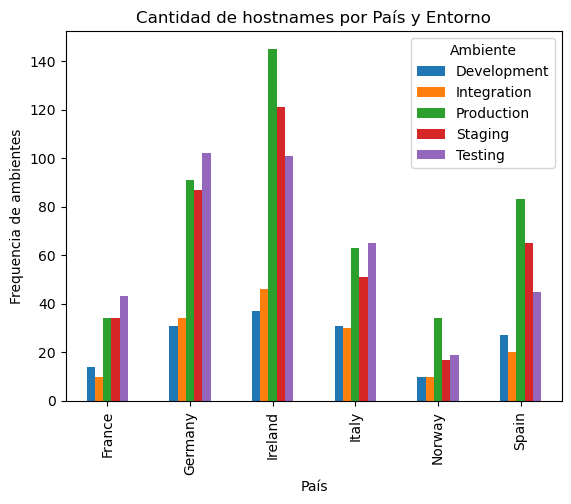

In [10]:
# 10. Generar un único grafico agrupando para cada país
agrupacion_por_pais_ambiente = df.groupby(['country', 'environment']).size().unstack(fill_value=0)
agrupacion_por_pais_ambiente.plot(kind='bar', stacked=False)
plt.legend(title='Ambiente')
plt.title('Cantidad de hostnames por País y Entorno')
plt.xlabel('País')
plt.ylabel('Frequencia de ambientes')
plt.show()

In [11]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val) # Mostrar valores en pie chart. 
    return my_autopct

def make_legend_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int((pct*total/100.0) + 0.5)  # adding 0.5 rounds to the nearest whole number
        return '{v:d}'.format(v=val)
    return my_autopct

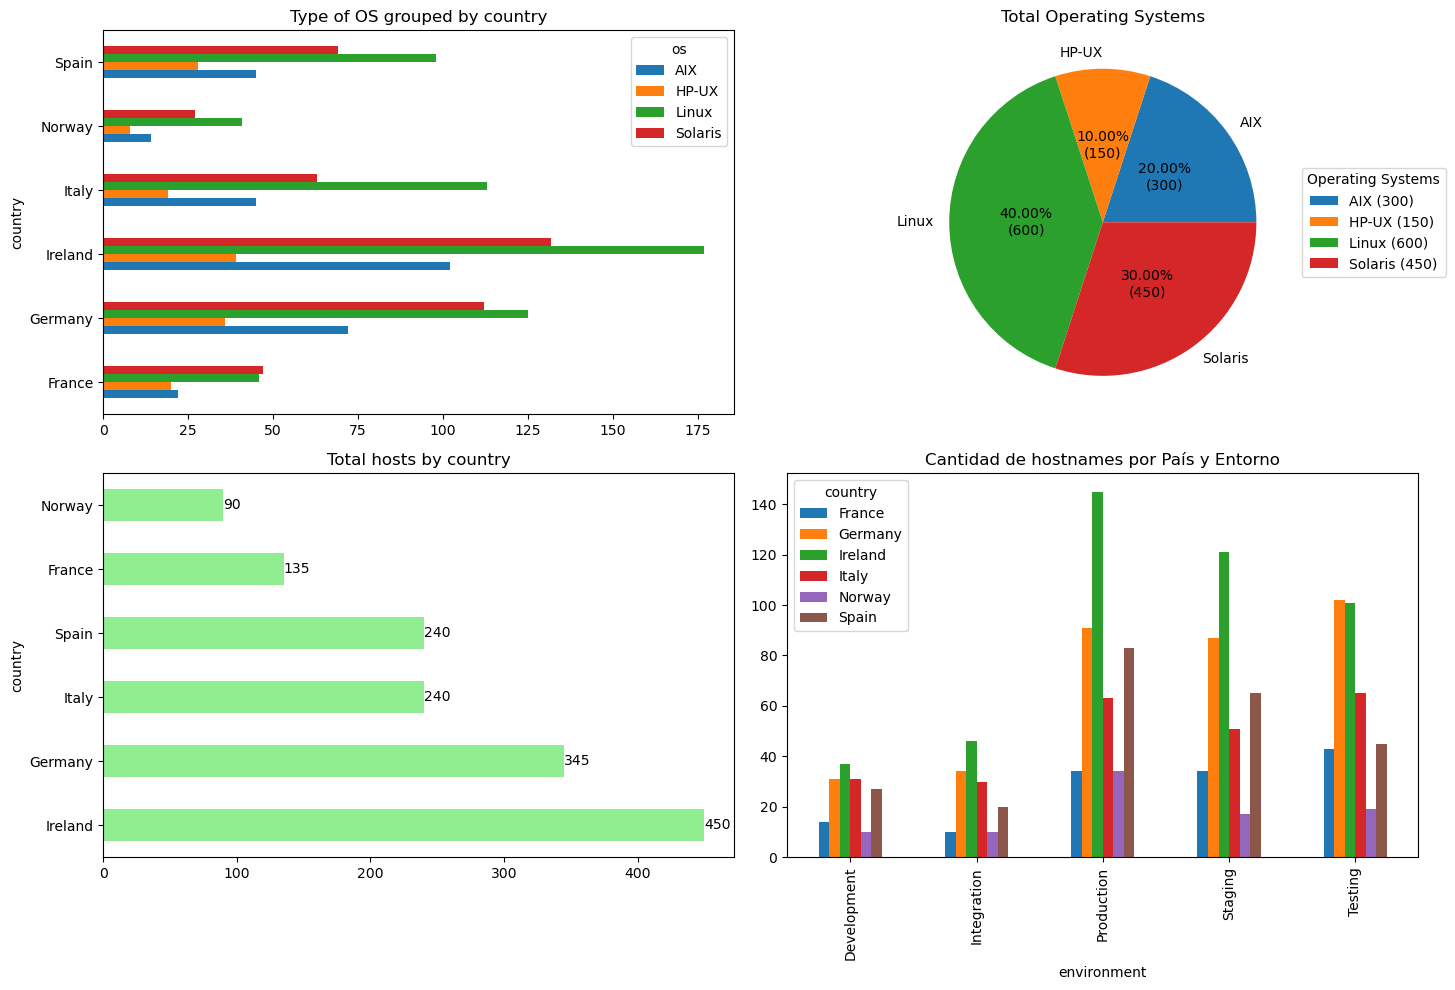

In [12]:
# 11. Crear una figura con 4 graficos en una malla de 2 filas y 2 columnas 


fig, axs = plt.subplots(2, 2, figsize=(15, 10)) # Create a 2x2 grid of subplots.

# Plot 1:
agrupacion_por_sistema_operativo = df.groupby(['os','country']).size().unstack(0)
agrupacion_por_sistema_operativo.plot(kind='barh', stacked=False, ax=axs[0, 0])
axs[0,0].set_title('Type of OS grouped by country')

# Plot 2:
os_counts = df.groupby('os')['os'].count()
axs[0, 1].pie(os_counts, labels=os_counts.index, autopct=make_autopct(os_counts), pctdistance=0.5)
legend_labels = ['{0} ({1})'.format(i, make_legend_autopct(os_counts.values)(j)) for i, j in zip(os_counts.index, os_counts / os_counts.sum() * 100)]

# Leyenda y titulo para plot 2 
axs[0, 1].legend(legend_labels, title="Operating Systems", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

axs[0, 1].set_title("Total Operating Systems")

# Mas de lo mismo
country_counts = df.groupby('country')['country'].count().sort_values(ascending=False)
country_counts.plot(kind='barh', color='lightgreen', ax=axs[1, 0]) 
axs[1, 0].set_title('Total hosts by country')

for bar in axs[1, 0].containers[0]:
    axs[1, 0].text(bar.get_width(), bar.xy[1] + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center')

# Plot 4: Bar plot for 'Cantidad de hostnames por País y Entorno'.
environment_country_counts = df.groupby(['environment', 'country']).size().unstack(fill_value=0)
environment_country_counts.plot(kind='bar', stacked=False, ax=axs[1, 1]) # Plot on the fourth subplot.
axs[1, 1].set_title('Cantidad de hostnames por País y Entorno')

plt.tight_layout() # Ajuste
plt.show() 
